In [4]:
# Dependencies
import cv2
import numpy as np

In [5]:
# Utilities

In [6]:
# Dev-Dependencies
import matplotlib.pyplot as plt

In [7]:
# Dev-Utilities
def imdisp(img, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.show()

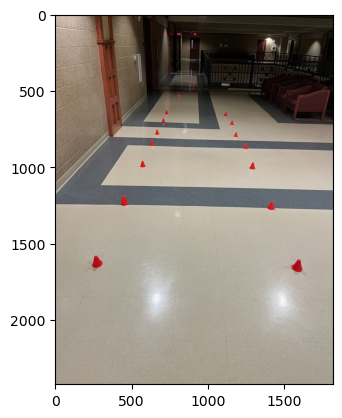

In [8]:
img = cv2.imread("red.png")
# In OpenCV we work with BGR for historical reasons
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# But for processing we want to use the L*a*b* colorspace
lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
# Let's make sure we did this right
imdisp(img)

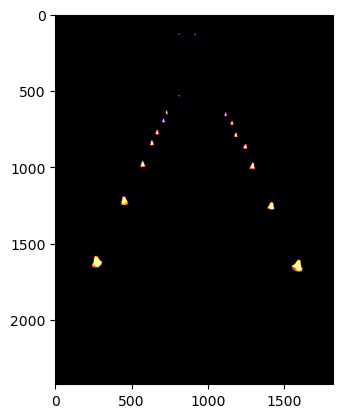

In [9]:
# We want to filter for the red color of the cones
# We can do a pretty good job of this since the a*
# axis of the L*a*b* colorspace tells you how red
# (or green) something is
COLOR_FILTER_LO = np.array([50, 160, 0])
COLOR_FILTER_HI = np.array([90, 255, 255])
mask = cv2.inRange(lab, COLOR_FILTER_LO, COLOR_FILTER_HI)
imdisp(mask, cmap='inferno')

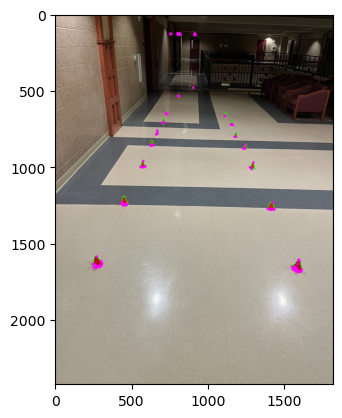

In [71]:
# Now, let's turn this into a set of points, by finding
# contours in the image and choosing the highest contour
# point (which should be the top of the cone)
conts, hier = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
with_conts = cv2.drawContours(img, conts, -1, (0, 255, 0), 3)
# Now we'll loop through our contours and pick the highest points
highest_points = [ None for _ in conts ]
for i, cont in enumerate(conts):
    highest_point = None
    for [point] in cont:
        if highest_point is None or point[1] > highest_point[1]:
            highest_point = point
    highest_points[i] = highest_point
    with_conts = cv2.circle(with_conts, highest_point, 5, (255, 0, 255), 5)
imdisp(with_conts)